# A Road to Frictionless Urban Data Science: `osmnx` & `cenpy`. 

With better geospatial computation tools than ever, urban data science is becoming easier and more accessbile. But, one of the most difficult parts of *Doing* data science is getting clean, useful data in a format that you can actually analyze. Fortunately, a variety of new packages in Python can help with this. We'll look at two here:

## OSMNX

OSMNX, (styled `osmnx`), is a well-used package to examine Open Streetmap data from python. A good overview of the core concepts & ideas comes from [@gboeing](https://geoffboeing.com/2018/03/osmnx-features-roundup/), the lead author and maintainer of the package. Here, we'll use it to extract the street network of Austin, TX. 


## Cenpy

CenPy (pronounced `sen-pie`) is a a python package for interacting with the US Census Bureau's Data Products, hosted at [`api.census.gov`](https://api.census.gov). The Census exposes *a ton* of data products for people to use. Cenpy itself provides 2 "levels" of access. 

### Census `products`

Most users simply want to get into the census, retrieve data, and then map, plot, analyze, or model that data. For this, `cenpy` wraps the main "products" that users may want to access: the American Community Survey & 2010 Decennial Census. These are desgined to interface directly with the US Census Bureau's data APIs, get both the geographies & data from the US Census, and return that to the user, ready to plot. We'll cover this API here. 

### Building Blocks of `cenpy.products`

For those interested, `cenpy` also has a lower-level interface designed to directly interact with US Census data products through their two constituent parts: the *data product* from https://api.census.gov, and the *geography product*, from the US Census's ESRI MapServer. This is intended for developers to build new `products` or to interface directly with the API as they wish. This is pretty straightforward to use, but requires a bit more technical knowledge to make *just work*, so if you simply need US Census or ACS data, focus on the `product` API. 

# Using the Packages

To use packages in python, you must first `import` the package. Below, we import three packages:

- `cenpy`
- `osmnx`
- `matplotlib.pyplot`

In [1]:
!pip install geopandas==0.8.2
!pip install contextily
!pip install osmnx
!pip install cenpy

In [2]:
import cenpy
import osmnx
import matplotlib.pyplot as plt
%matplotlib inline

`osmnx` and `cenpy.products` work using a *place*-oriented API. This means that users specify a place name, like `Columbus, OH` or `Kansas City, MO-KS`, or `California`, and the package parses this name and grabs the relevant data. `osmnx` uses the Open Street Map service and `cenpy` uses the Us Census Bureau's service, so they can sometimes disagree slightly, *especially* when considering older census products. Regardless, to grab the US census data using `cenpy`, you pass the place name and the columns of the Census product you wish to extract. Below, we'll grab two columns from the American Community Survey: Total population (`B02001_001E`) and count of African American persons (`B02001_003E`). We'll grab this from Austin, TX:

In [3]:
al_data = cenpy.products.ACS().from_county('Alameda, CA', 
                                           variables=['B02001_001E', 'B02001_003E'])

/Users/alben/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
al_data

,GEOID,geometry,B02001_001E,B02001_003E,NAME,state,county,tract
0,06001441524,"POLYGON ((-13587578.570 4518775.620, -13587550...",4432.0,79.0,"Census Tract 4415.24, Alameda County, California",06,001,441524
1,06001444100,"POLYGON ((-13586775.400 4516294.100, -13586758...",7752.0,76.0,"Census Tract 4441, Alameda County, California",06,001,444100
2,06001441302,"POLYGON ((-13584576.390 4518985.030, -13584553...",5881.0,166.0,"Census Tract 4413.02, Alameda County, California",06,001,441302
3,06001440335,"POLYGON ((-13583367.570 4521290.320, -13583346...",6979.0,275.0,"Census Tract 4403.35, Alameda County, California",06,001,440335
4,06001441200,"POLYGON ((-13581697.670 4520696.960, -13581688...",6977.0,177.0,"Census Tract 4412, Alameda County, California",06,001,441200
...,...,...,...,...,...,...,...,...
356,06001450743,"POLYGON ((-13570639.750 4537427.870, -13570630...",6496.0,397.0,"Census Tract 4507.43, Alameda County, California",06,001,450743
357,06001450101,"POLYGON ((-13570270.950 4537948.880, -13570187...",5230.0,416.0,"Census Tract 4501.01, Alameda County, California",06,001,450101
358,06001451703,"POLYGON ((-13559338.480 4530957.120, -13559338...",4493.0,27.0,"Census Tract 4517.03, Alameda County, California",06,001,451703
359,06001451704,"POLYGON ((-13558548.780 4530964.710, -13558548...",4668.0,64.0,"Census Tract 4517.04, Alameda County, California",06,001,451704


When this runs, `cenpy` does a few things:
1. it asks the census for all the relevant US Census Tracts that fall within Austin, TX
2. it parses the shapes of Census tracts to make sure they're valid
3. it parses the data from the Census to ensure it's valid

Above, you may see a warning that the Austin, TX shape is *invalid*! This is `cenpy` running validation on the data. This problem can be fixed, but does not immediately affect analyses. 

Likewise, OSMNX has a place-oriented API. To grab the street network from Austin, we can run a similar query:

In [5]:
al_graph = osmnx.graph_from_place('Alameda, CA')

However, the two pcakages default representations are quite different. `osmnx` focuses on the `networkx` package for its core representation (hence, `osm` for Open Streetmap and `nx` for NetworkX):

In [6]:
al_graph

In contrast `cenpy` uses `pandas` (and, specifically, `geopandas`) to express the demographics and geography of US Census data. These packages provide dataframes, like spreadsheets, which can be used to analyze data in Python. Below, each road contains the shape of *one* US Census tract (the geometry used by default in by `cenpy`), and the columns provide descriptive information about the tract. 

In [7]:
al_data.head()

,GEOID,geometry,B02001_001E,B02001_003E,NAME,state,county,tract
0,06001441524,"POLYGON ((-13587578.570 4518775.620, -13587550...",4432.0,79.0,"Census Tract 4415.24, Alameda County, California",06,001,441524
1,06001444100,"POLYGON ((-13586775.400 4516294.100, -13586758...",7752.0,76.0,"Census Tract 4441, Alameda County, California",06,001,444100
2,06001441302,"POLYGON ((-13584576.390 4518985.030, -13584553...",5881.0,166.0,"Census Tract 4413.02, Alameda County, California",06,001,441302
3,06001440335,"POLYGON ((-13583367.570 4521290.320, -13583346...",6979.0,275.0,"Census Tract 4403.35, Alameda County, California",06,001,440335
4,06001441200,"POLYGON ((-13581697.670 4520696.960, -13581688...",6977.0,177.0,"Census Tract 4412, Alameda County, California",06,001,441200


Fortunately, you can convert the `networkx` objects that `osmnx` focuses on into `pandas` dataframes, so that both `cenpy` and `osmnx` match in their representation. This makes it very easy to work with OSM data alongside of census data. 

To convert the OSM data into a `pandas` dataframe, we must do two things.

First, we need to use the `osmnx.graph_to_gdfs` to convert the graph to `GeoDataFrames`, which are like a standard `pandas.DataFrame`, but with additional geographic information on the shape of each road. The `graph_to_gdfs` actually produces *two* dataframes: one full of roads and one full of *intersections*. We'll separate the two below:

In [8]:
al_nodes, al_streets  = osmnx.graph_to_gdfs(al_graph)

Now, the `aus_streets` dataframe looks like the `aus_data` dataframe, where each row is a street, and columns contain some information about the street:

In [9]:
al_streets.head()

osmid  oneway  \
u        v          key                                                        
29891391 257431662  0                          [23761355, 393883653]    True   
         30029475   0                 [45310274, 45310307, 51056951]    True   
29891439 33239314   0               [417313392, 839809347, 83590759]    True   
         1678683810 0                         [394475528, 839809344]    True   
30029450 1747281439 0    [394181700, 93808884, 119744069, 119744079]    True   

                          lanes        highway    length  \
u        v          key                                    
29891391 257431662  0    [2, 1]  motorway_link   570.142   
         30029475   0         4       motorway  1010.901   
29891439 33239314   0         2  motorway_link   436.394   
         1678683810 0         3       motorway   715.584   
30029450 1747281439 0    [3, 2]  motorway_link   490.243   

                                                                  geometry  \
u        v          key                                                      
29891391 257431662  0    LINESTRING (-122.02724 37.70090, -122.02650 37...   
         30029475   0    LINESTRING (-122.02724 37.70090, -122.02663 37...   
29891439 33239314   0    LINESTRING (-122.09802 37.63786, -122.09828 37...   
         1678683810 0    LINESTRING (-122.09802 37.63786, -122.09834 37...   
30029450 1747281439 0    LINESTRING (-121.79509 37.70092, -121.79523 37...   

                           ref                            name maxspeed  \
u        v          key                                                   
29891391 257431662  0      NaN                             NaN      NaN   
         30029475   0    I 580  Arthur H. Breed Junior Freeway   65 mph   
29891439 33239314   0      NaN                             NaN   65 mph   
         1678683810 0    CA 92                             NaN   65 mph   
30029450 1747281439 0      NaN                             NaN      NaN   

                        bridge tunnel service access width junction est_width  \
u        v          key                                                         
29891391 257431662  0      NaN    NaN     NaN    NaN   NaN      NaN       NaN   
         30029475   0      yes    NaN     NaN    NaN   NaN      NaN       NaN   
29891439 33239314   0      NaN    NaN     NaN    NaN   NaN      NaN       NaN   
         1678683810 0      NaN    NaN     NaN    NaN   NaN      NaN       NaN   
30029450 1747281439 0      yes    NaN     NaN    NaN   NaN      NaN       NaN   

                        area  
u        v          key       
29891391 257431662  0    NaN  
         30029475   0    NaN  
29891439 33239314   0    NaN  
         1678683810 0    NaN  
30029450 1747281439 0    NaN

The last bit of data processing that is needed to make the two datasets fully comport within one another is to set their *coordinate reference systems* to ensure that they align. The US Census provides geographical data in Web Mercator projection (likely due to the fact that it serves many webmapping applications in the US Government), whereas the Open Streetmap project serves data in raw latitude/longitude by default. 

To convert data between coordinate reference systems, we can use the `to_crs` method of `GeoDataFrames`. This changes the coordinate reference system for the dataframe. To convert one dataframe into the coordiante reference system of another, it's often enough to provide the coordinate reference of the *target* dataframe to the `to_crs` function:

In [10]:
al_data = al_data.to_crs(al_streets.crs)

Now, the two dataframes have the same coordinate reference system:

In [11]:
al_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
al_streets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now, we can make maps using the data, or can conduct analyses using the streets & demographics of Austin, TX:

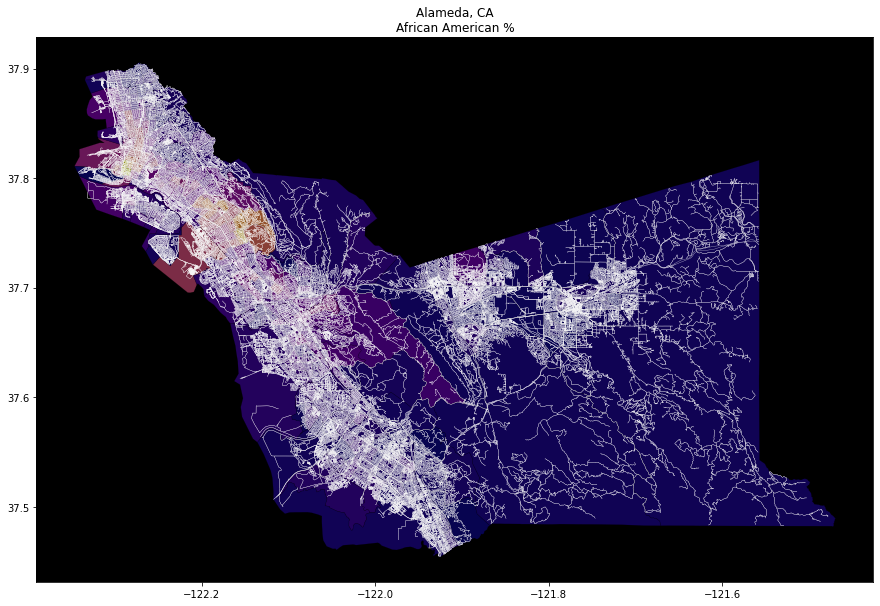

In [13]:
f,ax = plt.subplots(1,1, figsize=(15,15))
al_data.eval('pct_afam = B02001_003E / B02001_001E')\
        .plot('pct_afam', cmap='plasma', alpha=.6, ax=ax, linewidth=.25, edgecolor='k')
al_streets.plot(linewidth=.25, ax=ax, color='w')
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
ax.set_title('Alameda, CA\nAfrican American %')
ax.set_facecolor('k')

This means that urban data science in Python has never been easier! So much data is at your fingertips, `from_place` away. Both packages can be installed from `conda-forge`, the community-driven package repository in Anaconda, the scientific python distribution. Check out other examples of using [`cenpy`](https://cenpy-devs.github.io/cenpy) and [`osmnx`](https://osmnx.readthedocs.io/en/stable/) from their respective websites